# BSU project

#### In this project, I have imported dementia data from NHS digital website (https://digital.nhs.uk/data-and-information/publications/statistical/recorded-dementia-diagnoses/september-2022) to look at trends in ethnicity, geography organisation and effectiveness of prescribed treatment.
#### Thanks go to the NHS digital records and Lucy Knight's excellent python template.

### 1. Fetching and checking the data

In [152]:
import pandas as pd # import the pandas library
df = pd.read_csv("Dementia_Ethnicity_Sep_22.csv") # fetch the data. Ensure it is in same directory as CSV file
df.sample(20) # look at a selection of sample rows to see what types of values it contains

,ACH_DATE,COMMISSIONER_ORGANISATION_CODE,GEOGRAPHY_CODE,SUB_ICB_LOC_NAME,Measure,Value
1698,30-Jun-22,15F,E38000225,NHS West Yorkshire ICB - 15F,ASIAN_OR_ASIAN_BRITISH,205
2346,31-Jul-22,15N,E38000230,NHS Devon ICB - 15N,ASIAN_OR_ASIAN_BRITISH,19
14,30-Apr-22,00P,E38000176,NHS North East and North Cumbria ICB - 00P,MIXED_OR_MULTIPLE_ETHNIC_GROUPS,0
3030,31-Aug-22,52R,E38000243,NHS Nottingham and Nottinghamshire ICB - 52R,ASIAN_OR_ASIAN_BRITISH,182
49,30-Apr-22,00Y,E38000135,NHS Greater Manchester ICB - 00Y,BLACK_OR_AFRICAN_OR_CARIBBEAN_OR_BLACK_BRITISH,1
1763,30-Jun-22,52R,E38000243,NHS Nottingham and Nottinghamshire ICB - 52R,WHITE,6131
1443,30-Jun-22,02Q,E38000008,NHS Nottingham and Nottinghamshire ICB - 02Q,NOT_DEFINED,278
2734,31-Aug-22,02Y,E38000052,NHS Humber and North Yorkshire ICB - 02Y,OTHER_ETHNIC_GROUP,2
2633,31-Aug-22,01H,E38000215,NHS North East and North Cumbria ICB - 01H,WHITE,1082
933,31-May-22,06K,E38000049,NHS Hertfordshire and West Essex ICB - 06K,NOT_DEFINED,1586


In [24]:
df.columns # list the column names (useful if the previous view doesn't show us everything we need). 
# A list of the names makes it easier to check for spelling and capitalisation
# Useful if we want to remove columns or want to look at a specific column 

Index(['ACH_DATE', 'COMMISSIONER_ORGANISATION_CODE', 'GEOGRAPHY_CODE',
       'SUB_ICB_LOC_NAME', 'Measure', 'Value'],
      dtype='object')

In [ ]:
df['SUB_ICB_LOC_NAME'].nunique()
# There are too many unique SUB_ICB_LOC_NAME. A given location (NE + Cumbria) can have multiple ICB

106

In [ ]:
# Overview of data columns present

# ACH_DATE: Date when data was acquired (can drop)
# COMMISSIONER_ORGANISATION_CODE: Integrated care board (ICB) code (can drop)
# GEOGRAPHY_CODE: 9-digit ONS information (can drop)
# SUB_ICB_LOC_NAME: Name of integrated care board (ICB) and associated ICB code
# Measure: Ethnicty
# Value: Count of ethnicity

### 2. Tidying the data

In [ ]:
# Generating a new 'Location' column from SUB_ICB_LOC_NAME WITHOUT commissioner organisation code
# Splits the SUB_ICB_LOC_NAME by delimitter -
# Keeps only the first part of the string split 
# Results in a given location having only one ICB instead of multiple
df['Location'] = df['SUB_ICB_LOC_NAME'].str.split('-').str[0]

df.head()

,ACH_DATE,COMMISSIONER_ORGANISATION_CODE,GEOGRAPHY_CODE,SUB_ICB_LOC_NAME,Measure,Value,Location
0,30-Apr-22,00L,E38000130,NHS North East and North Cumbria ICB - 00L,ASIAN_OR_ASIAN_BRITISH,4,NHS North East and North Cumbria ICB
1,30-Apr-22,00L,E38000130,NHS North East and North Cumbria ICB - 00L,BLACK_OR_AFRICAN_OR_CARIBBEAN_OR_BLACK_BRITISH,0,NHS North East and North Cumbria ICB
2,30-Apr-22,00L,E38000130,NHS North East and North Cumbria ICB - 00L,MIXED_OR_MULTIPLE_ETHNIC_GROUPS,0,NHS North East and North Cumbria ICB
3,30-Apr-22,00L,E38000130,NHS North East and North Cumbria ICB - 00L,NOT_DEFINED,869,NHS North East and North Cumbria ICB
4,30-Apr-22,00L,E38000130,NHS North East and North Cumbria ICB - 00L,OTHER_ETHNIC_GROUP,2,NHS North East and North Cumbria ICB


In [154]:
df2 = df.drop(columns = ['ACH_DATE', 'COMMISSIONER_ORGANISATION_CODE', 'GEOGRAPHY_CODE', 'SUB_ICB_LOC_NAME']) # Remove unneccessary columns from data set
df2.columns #see column names of updated dataframe

Index(['Measure', 'Value', 'Location'], dtype='object')

In [199]:
df2.sample(10) # A quick glance at the new dataframe

,Measure,Value,Location
684,Asian,104,Greater Manchester
1602,Asian,41,Hertfordshire and West Essex
3789,Not defined,8836,Hampshire and Isle Of Wight
1023,Not defined,1023,Cheshire and Merseyside
3075,Not defined,5479,Surrey Heartlands
1436,Multiple ethnicities,1,South Yorkshire
573,Not defined,532,Mid and South Essex
2618,Multiple ethnicities,0,Cheshire and Merseyside
213,Not defined,811,South Yorkshire
2697,Not defined,1435,Greater Manchester


In [155]:
df2.shape # see how many rows and columns of updated dataframe we have

(3816, 3)

In [156]:
df2.dtypes # determine the data types of each column. Looks good


Measure     object
Value        int64
Location    object
dtype: object

In [157]:
df2.info() # shows that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Measure   3816 non-null   object
 1   Value     3816 non-null   int64 
 2   Location  3816 non-null   object
dtypes: int64(1), object(2)
memory usage: 89.6+ KB


In [158]:
#check possible values for Location
df2['Location'].nunique()

42

In [ ]:
#Tidy up Location column
#Remove NHS and ICB from Location
df2['Location'] = df2['Location'].str.replace('ICB','')
df2['Location'] = df2['Location'].str.replace('NHS','')

df2.head()

,Measure,Value,Location
0,ASIAN_OR_ASIAN_BRITISH,4,North East and North Cumbria
1,BLACK_OR_AFRICAN_OR_CARIBBEAN_OR_BLACK_BRITISH,0,North East and North Cumbria
2,MIXED_OR_MULTIPLE_ETHNIC_GROUPS,0,North East and North Cumbria
3,NOT_DEFINED,869,North East and North Cumbria
4,OTHER_ETHNIC_GROUP,2,North East and North Cumbria


In [ ]:
# check possible values for Measure column
df2['Measure'].unique()

array(['ASIAN_OR_ASIAN_BRITISH',
       'BLACK_OR_AFRICAN_OR_CARIBBEAN_OR_BLACK_BRITISH',
       'MIXED_OR_MULTIPLE_ETHNIC_GROUPS', 'NOT_DEFINED',
       'OTHER_ETHNIC_GROUP', 'WHITE'], dtype=object)

In [ ]:
# For simplicity, I will relabel the ethnicities as follows:
    # Asian: ASIAN_OR_ASIAN_BRITISH
    # Black: BLACK_OR_AFRICAN_OR_CARIBBEAN_OR_BLACK_BRITISH'
    # Multiple ethnicities: 'MIXED_OR_MULTIPLE_ETHNIC_GROUPS'
    # Not defined: NOT_DEFINED
    # Other ethnicity: MIXED_OR_MULTIPLE_ETHNIC_GROUPS', 'NOT_DEFINED',
    # White: WHITE
# I will add in the legend more details


In [200]:
# String replace to tidy the data

df2['Measure'] = df2['Measure'].str.replace('ASIAN_OR_ASIAN_BRITISH','Asian')
df2['Measure'] = df2['Measure'].str.replace('BLACK_OR_AFRICAN_OR_CARIBBEAN_OR_BLACK_BRITISH','Black')
df2['Measure'] = df2['Measure'].str.replace('MIXED_OR_MULTIPLE_ETHNIC_GROUPS','Multiple ethnicities')
df2['Measure'] = df2['Measure'].str.replace('OTHER_ETHNIC_GROUP','Other ethnicity')
df2['Measure'] = df2['Measure'].str.replace('NOT_DEFINED','Not defined')
df2['Measure'] = df2['Measure'].str.replace('WHITE','White')

df2['Measure'].unique() # Displaying the ethnicities of the measure column
#df2['Measure'].nunique() # checking the values we now have as categories


array(['Asian', 'Black', 'Multiple ethnicities', 'Not defined',
       'Other ethnicity', 'White'], dtype=object)

In [ ]:
df2.head(10) # Quick look at the data

,Measure,Value,Location
0,Asian,4,North East and North Cumbria
1,Black,0,North East and North Cumbria
2,Multiple ethnicities,0,North East and North Cumbria
3,Not defined,869,North East and North Cumbria
4,Other ethnicity,2,North East and North Cumbria
5,White,2265,North East and North Cumbria
6,Asian,10,North East and North Cumbria
7,Black,0,North East and North Cumbria
8,Multiple ethnicities,8,North East and North Cumbria
9,Not defined,905,North East and North Cumbria


#### 3. Gaining basic stats of the dataframe

In [203]:

#Determines total of each ethnicity as well as the overall total of patients
#Note that 'Not defined' is ignored in this analysi- assumption is that patient did not answer the question
df_asian = df2.loc[df2['Measure'] == 'Asian', 'Value'].sum()
df_black = df2.loc[df2['Measure'] == 'Black', 'Value'].sum()
df_multiple = df2.loc[df2['Measure'] == 'Multiple ethnicities', 'Value'].sum()
df_other = df2.loc[df2['Measure'] == 'Other ethnicity', 'Value'].sum()
df_not_defined = df2.loc[df2['Measure'] == 'Not defined', 'Value'].sum()
df_white = df2.loc[df2['Measure'] == 'White', 'Value'].sum()
df_total = df2['Value'].sum()


print(
    "Asian =", df_asian,
    "\nBlack =", df_black,
    "\nMultiple ethnicities =", df_multiple,
    "\nOther ethnicity =", df_other,
    "\nNot defined =", df_not_defined,
    "\nWhite =", df_white,
    "\nOveral total =", df_total,
    )

Asian = 83273 
Black = 4314 
Multiple ethnicities = 15162 
Other ethnicity = 16918 
Not defined = 1399893 
White = 1169742 
Overal total = 2689302


In [ ]:
# create a new dataframe which includes the totals of the ethnicities
# Note that 'Not defined' is excluded from this data set
data = [['Asian', 83273],
       ['Black', 4314],
       ['Multiple ethnicities', 15162],
       ['Other ethnicity', 16918],
       ['white', 1169742]]

# create a DataFrame from the list
df3 = pd.DataFrame(data, columns=['Ethnicity', 'Value'])

print(df3)
# In retrospect, this works quite well but very challenging with lots of elements

              Ethnicity    Value
0                 Asian    83273
1                 Black     4314
2  Multiple ethnicities    15162
3       Other ethnicity    16918
4                 white  1169742


In [169]:
df_group = df2.groupby('Location')['Value'].sum() # Determines the sum of each Location. More simple than the previous bit of code!

df4 = pd.DataFrame(df_group, columns=['Value'])
df4

,Value
Location,
"Bath and North East Somerset, Swindon and Wiltshire",45323
"Bedfordshire, Luton and Milton Keynes",39336
Birmingham and Solihull,51256
Black Country,54494
"Bristol, North Somerset and South Gloucestershire",46545
"Buckinghamshire, Oxfordshire and Berkshire West",79840
Cambridgeshire and Peterborough,36342
Cheshire and Merseyside,129631
Cornwall and The Isles Of Scilly,31335


In [ ]:
df2_multi = pd.MultiIndex.from_frame(df2, names=["Location", "Measure", "Value"]) # Changed to multiindex which allows a hierarchy to be developed

df5 = df2.groupby(["Location", "Measure"]).sum().unstack('Measure') # hierarchy is 1. Location and 2. Measure (Ethnicity). Values are summed for each Measure (ethnicity)
df5
# I struggled to plot graphs while in a multiindex format
# I have instead copied the data and saved it as a separate csv ("Dementia_Ethnicity_Totals.csv")

Value        \
Measure                                             Asian Black   
Location                                                          
Bath and North East Somerset, Swindon and Wilts...    242    14   
Bedfordshire, Luton and Milton Keynes                2051   321   
Birmingham and Solihull                              5195   180   
Black Country                                        4252   280   
Bristol, North Somerset and South Gloucestershi...    378    95   
Buckinghamshire, Oxfordshire and Berkshire West      1873   106   
Cambridgeshire and Peterborough                       681    12   
Cheshire and Merseyside                               547    21   
Cornwall and The Isles Of Scilly                       29     0   
Coventry and Warwickshire                            1648    17   
Derby and Derbyshire                                 1088     6   
Devon                                                 111     9   
Dorset                                                107     0   
Frimley                                              1451    36   
Gloucestershire                                       281    32   
Greater Manchester                                   4976   237   
Hampshire and Isle Of Wight                           717    19   
Herefordshire and Worcestershire                      152    10   
Hertfordshire and West Essex                         1710     6   
Humber and North Yorkshire                            210     6   
Kent and Medway                                       711    60   
Lancashire and South Cumbria                         2199   107   
Leicester, Leicestershire and Rutland                4787    17   
Lincolnshire                                          180     0   
Mid and South Essex                                   506    51   
Norfolk and Waveney                                   119     6   
North Central London                                 4465   358   
North East London                                    8350   271   
North East and North Cumbria                          994    18   
North West London                                   15084   347   
Northamptonshire                                      445    67   
Nottingham and Nottinghamshire                       1078    62   
Shropshire, Telford and Wrekin                        143    20   
Somerset                                               38     0   
South East London                                    2355   462   
South West London                                    4357   605   
South Yorkshire                                       938    22   
Staffordshire and Stoke                               695   174   
Suffolk and North East Essex                          235    51   
Surrey Heartlands                                    1003    44   
Sussex                                                756    57   
West Yorkshire                                       6136   108   

                                                                         \
Measure                                            Multiple ethnicities   
Location                                                                  
Bath and North East Somerset, Swindon and Wilts...                  101   
Bedfordshire, Luton and Milton Keynes                               242   
Birmingham and Solihull                                             735   
Black Country                                                      1197   
Bristol, North Somerset and South Gloucestershi...                  255   
Buckinghamshire, Oxfordshire and Berkshire West                     352   
Cambridgeshire and Peterborough                                     114   
Cheshire and Merseyside                                             244   
Cornwall and The Isles Of Scilly                                     18   
Coventry and Warwickshire                                           200   
Derby and Derbyshire                                         

In [ ]:
df6 = pd.read_csv("Dementia_Ethnicity_Totals.csv") # fetch the new data. Ensure it is in same directory as CSV file

In [190]:
df6.head()

,Location,Asian,Black,Multiple ethnicities,Not defined,Other ethnicity,White,Total
0,"Bath and North East Somerset, Swindon and Wilt...",242,14,101,35916,136,8914,45323
1,"Bedfordshire, Luton and Milton Keynes",2051,321,242,11118,725,24879,39336
2,Birmingham and Solihull,5195,180,735,28483,283,16380,51256
3,Black Country,4252,280,1197,23254,256,25255,54494
4,"Bristol, North Somerset and South Gloucestershire",378,95,255,20768,96,24953,46545


In [ ]:
df7 = df6[df6.Total > 77000] # I have selected locations where total is over 77000 which results in top 10 locations.
df7.head(5)


,Location,Asian,Black,Multiple ethnicities,Not defined,Other ethnicity,White,Total
5,"Buckinghamshire, Oxfordshire and Berkshire West",1873,106,352,47052,360,30097,79840
7,Cheshire and Merseyside,547,21,244,70976,621,57222,129631
15,Greater Manchester,4976,237,428,69172,674,50082,125569
16,Hampshire and Isle Of Wight,717,19,193,60124,304,37389,98746
19,Humber and North Yorkshire,210,6,75,57210,135,30620,88256


In [192]:
df7.nunique

<bound method DataFrame.nunique of                                            Location  Asian  Black  \
5   Buckinghamshire, Oxfordshire and Berkshire West   1873    106   
7                           Cheshire and Merseyside    547     21   
15                               Greater Manchester   4976    237   
16                      Hampshire and Isle Of Wight    717     19   
19                       Humber and North Yorkshire    210      6   
20                                  Kent and Medway    711     60   
21                     Lancashire and South Cumbria   2199    107   
28                     North East and North Cumbria    994     18   
40                                           Sussex    756     57   
41                                   West Yorkshire   6136    108   

    Multiple ethnicities  Not defined  Other ethnicity  White   Total  
5                    352        47052              360  30097   79840  
7                    244        70976              621  57222

In [ ]:
df8 = df7.drop(columns=['Total', 'Not defined']) # Remove Total and Not defined columns to make it easier to plot

#### 4. Data visualisation

In [43]:
%pip install seaborn # install seaborn module used for data visualisation
import matplotlib.pyplot as plt  # import matplotlib
import seaborn as sns # import seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'Number of ethnicities'}, xlabel='Ethnicity'>

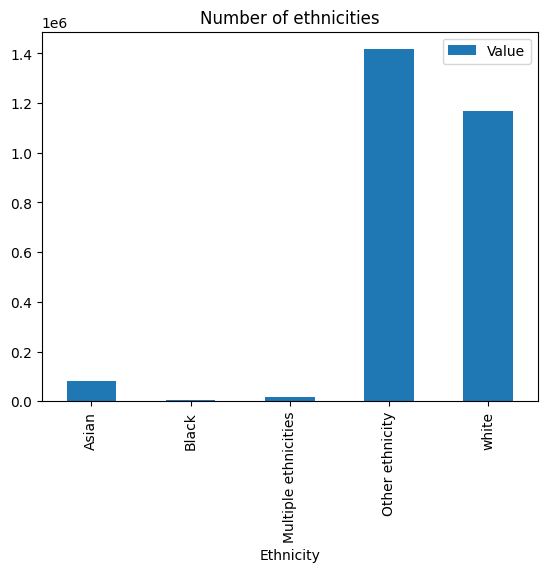

In [ ]:
# Create a bar plot. 
# Works for a quick look but not too readable.
df3.plot(x='Ethnicity', y='Value', kind='bar', title='Number of ethnicities')

C:\Users\Ben Edwards\AppData\Local\Temp\ipykernel_34240\4166742614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Multiple ethnicities'),
  Text(3, 0, 'Other ethnicity'),
  Text(4, 0, 'white')])

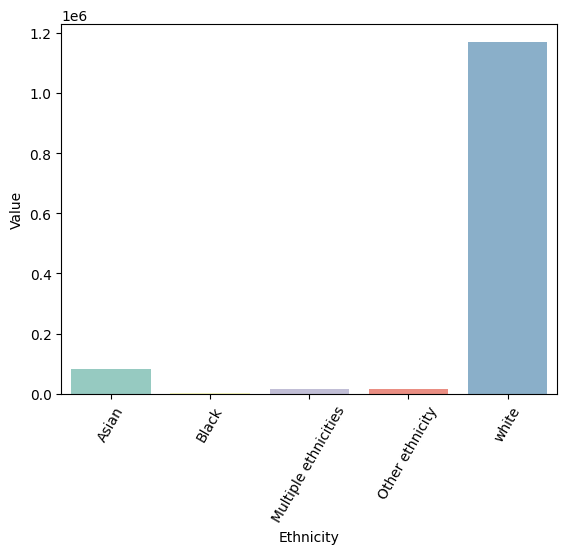

In [ ]:
sns.barplot(
    data=df3, 
    x="Ethnicity", 
    y="Value", 
    palette="Set3", 
    errorbar=None,
    )

plt.xticks(rotation=60) # rotates x-axis 60 degrees


In [113]:
print(df3)

              Ethnicity    Value
0                 Asian    83273
1                 Black     4314
2  Multiple ethnicities    15162
3       Other ethnicity  1416811
4                 white  1169742


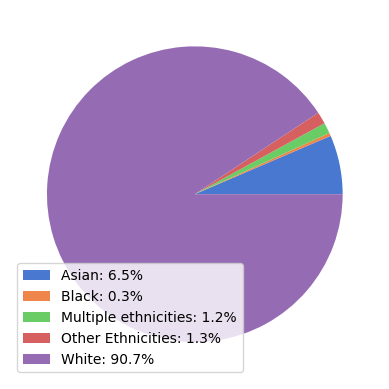

In [ ]:

# Define Seaborn color palette to use
# percentages overlapped on plot so have put manually into labels
colors = sns.color_palette('muted')[0:5]
labels = ["Asian: 6.5%", "Black: 0.3%", "Multiple ethnicities: 1.2%", "Other Ethnicities: 1.3%", "White: 90.7%"]

#create pie chart
plt.pie(x = "Value", data = df3, colors = colors)
plt.legend(labels = labels, loc='lower left',fontsize=10)
plt.show()

In [ ]:
# create a DataFrame from the list below
# Data refers to ethnicity proportions found in England 
# originates from the gov uk website 
#https://www.ethnicity-facts-figures.service.gov.uk/uk-population-by-ethnicity/national-and-regional-populations/population-of-england-and-wales/latest/#by-ethnicity-5-groups)
df8 = pd.DataFrame(data, columns=['Ethnicity', 'Value'])

data = [['Asian', 5515455],
       ['Black', 2409283],
       ['Multiple ethnicities', 717977],
       ['Other ethnicity', 1255632],
       ['white', 48699231]]

print(df8)
# In retrospect, this works quite well but very challenging with lots of elements


              Ethnicity     Value
0                 Asian   5515455
1                 Black   2409283
2  Multiple ethnicities    717977
3       Other ethnicity   1255632
4                 white  48699231


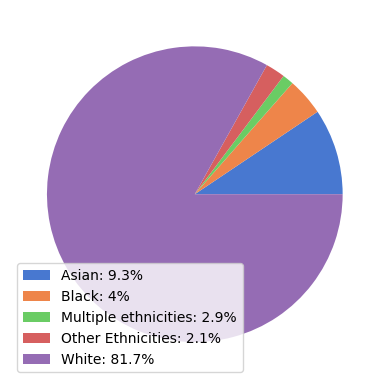

In [150]:
#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]
labels = ["Asian: 9.3%", "Black: 4%", "Multiple ethnicities: 2.9%", "Other Ethnicities: 2.1%", "White: 81.7%"]

#create pie chart
plt.pie(x = "Value", data = df8, colors = colors)
plt.legend(labels = labels, loc='lower left',fontsize=10)
plt.show()


<Axes: title={'center': 'Number of ethnicities'}, xlabel='Location'>

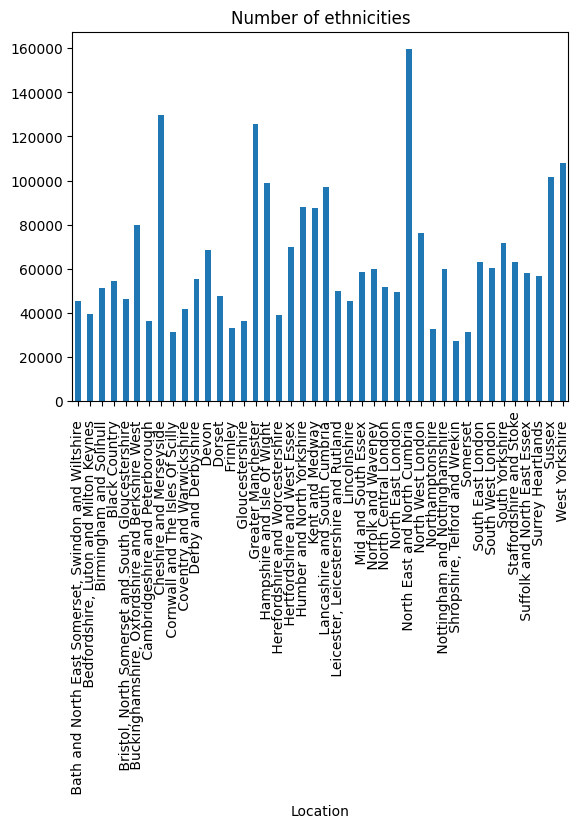

In [ ]:
df_group.plot(x='Location', y='Value', kind='bar', title='Number of ethnicities')
# Simple bar plot of all locations - ok but too much going on

#grouped = df2.groupby('Location')['Value'].sum()
#grouped.head(50)

Text(0.5, 0, 'Number of people')

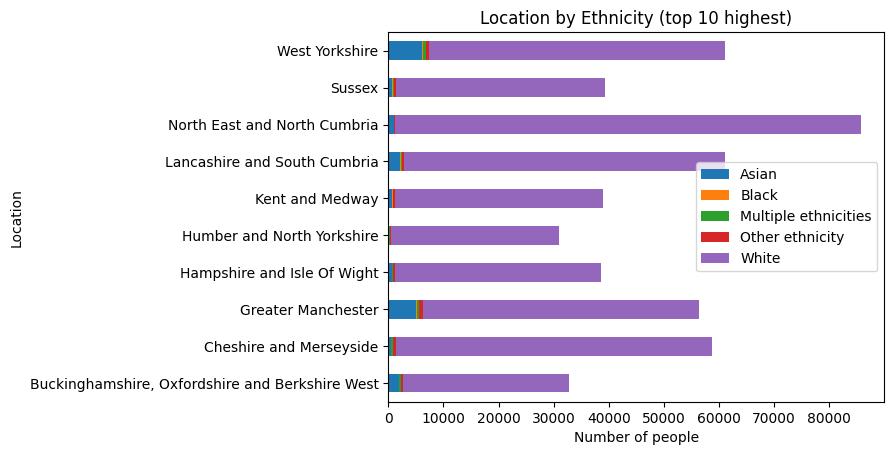

In [194]:
# importing packages 
import pandas as pd 
import matplotlib.pyplot as plt 
   
# plot a Stacked Bar Chart using matplotlib 
df8.plot( 
    x = 'Location', 
    kind = 'barh', 
    stacked = True, 
    title = 'Location by Ethnicity (top 10 highest)', 
    mark_right = True)

plt.xlabel('Number of people')





